In [ ]:
#@title Data Preprocessing

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


train/DME: 823 images
train/AMD: 861 images
train/ERM: 868 images
train/NO: 929 images
val/DME: 176 images
val/AMD: 184 images
val/ERM: 186 images
val/NO: 199 images
test/DME: 177 images
test/AMD: 186 images
test/ERM: 186 images
test/NO: 200 images


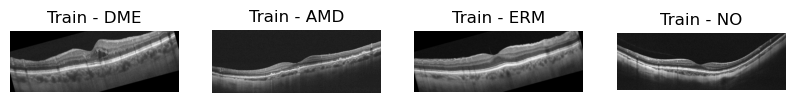

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Define the dataset directory
dataset_dir = "D:\\NOOR 4TH YEAR\\trial_split"

# Define the subsets and their corresponding class labels
subsets = ['train', 'val', 'test']
classes = ['DME', 'AMD', 'ERM', 'NO']

# Initialize a dictionary to hold the images
images = {subset: {cls: [] for cls in classes} for subset in subsets}

# Load images from each subset and class
for subset in subsets:
    for cls in classes:
        class_dir = os.path.join(dataset_dir, subset, cls)
        for filename in os.listdir(class_dir):
            if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(class_dir, filename)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    images[subset][cls].append(img)

# Display the number of images loaded for each subset and class
for subset in subsets:
    for cls in classes:
        print(f"{subset}/{cls}: {len(images[subset][cls])} images")

# Display a sample image from each class in the training set
plt.figure(figsize=(10, 5))
for i, cls in enumerate(classes):
    if images['train'][cls]:
        plt.subplot(1, 4, i + 1)
        plt.imshow(images['train'][cls][0], cmap='gray')
        plt.title(f"Train - {cls}")
        plt.axis('off')
plt.show()


In [ ]:
import os

# Define dataset path
dataset_path = "D:\\NOOR 4TH YEAR\\trial_split"

# Define subsets and classes
subsets = ['train', 'val', 'test']
classes = ['DME', 'AMD', 'ERM', 'NO']

# Dictionary to store image counts
dataset_summary = {subset: {} for subset in subsets}

# Count images in each class
for subset in subsets:
    for cls in classes:
        class_path = os.path.join(dataset_path, subset, cls)
        if os.path.exists(class_path):
            num_images = len([f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
            dataset_summary[subset][cls] = num_images
        else:
            dataset_summary[subset][cls] = 0  # If folder doesn't exist

# Display the dataset summary
print(f"{'Subset':<12}{'DME':<8}{'AMD':<8}{'ERM':<8}{'NO':<8}{'Total':<8}")
print("=" * 50)

for subset, counts in dataset_summary.items():
    total = sum(counts.values())
    print(f"{subset:<12}{counts['DME']:<8}{counts['AMD']:<8}{counts['ERM']:<8}{counts['NO']:<8}{total:<8}")

# Calculate and print overall total
overall_total = sum(sum(counts.values()) for counts in dataset_summary.values())
print("=" * 50)
print(f"{'Total':<12}{sum(row['DME'] for row in dataset_summary.values()):<8}"
      f"{sum(row['AMD'] for row in dataset_summary.values()):<8}"
      f"{sum(row['ERM'] for row in dataset_summary.values()):<8}"
      f"{sum(row['NO'] for row in dataset_summary.values()):<8}"
      f"{overall_total:<8}")


Subset      DME     AMD     ERM     NO      Total   
train       823     861     868     929     3481    
val         176     184     186     199     745     
test        177     186     186     200     749     
Total       1176    1231    1240    1328    4975    


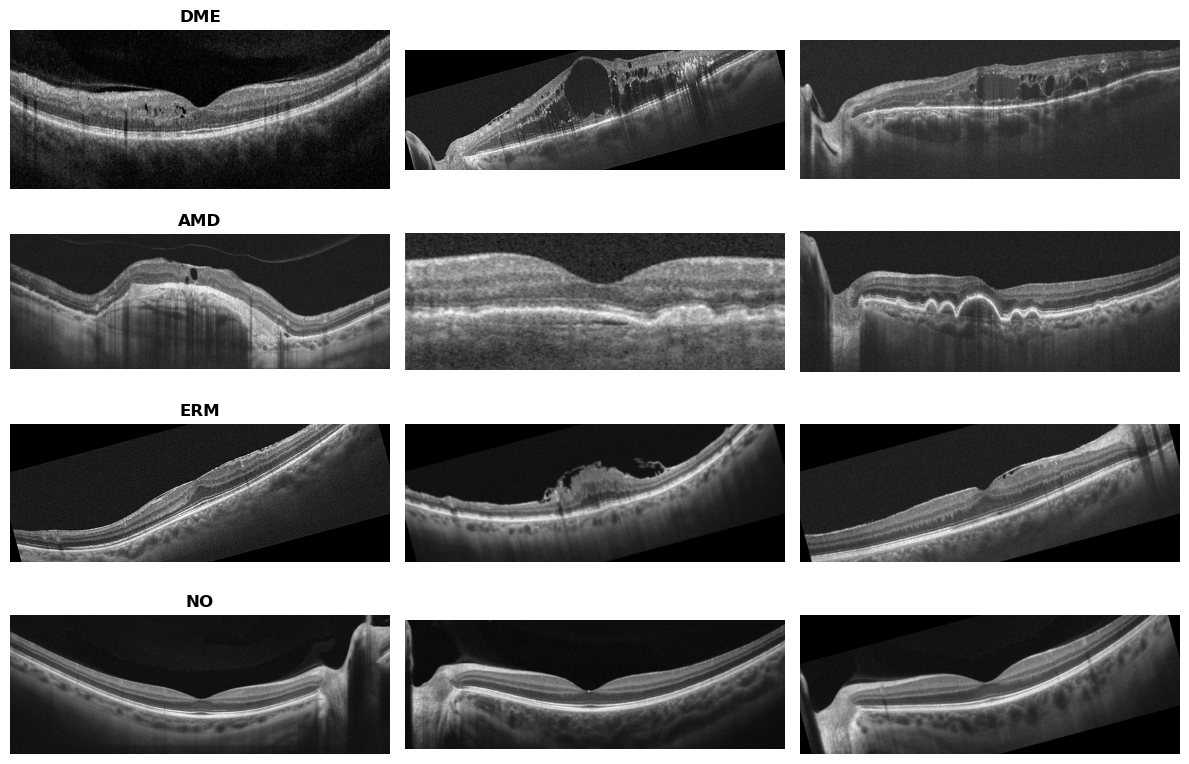

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import random

# Define dataset path
dataset_path ="D:\\NOOR 4TH YEAR\\trial_split"

# Select subset (train, val, or test)
subset = "train"  # Change this if needed
classes = ['DME', 'AMD', 'ERM', 'NO']

# Number of images to display per class
num_samples = 3

# Create a figure for displaying images
fig, axes = plt.subplots(len(classes), num_samples, figsize=(12, 8))

for i, cls in enumerate(classes):
    class_path = os.path.join(dataset_path, subset, cls)
    images = [img for img in os.listdir(class_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]

    # Select random images
    sample_images = random.sample(images, min(num_samples, len(images)))

    for j, img_name in enumerate(sample_images):
        img_path = os.path.join(class_path, img_name)
        img = Image.open(img_path)

        axes[i, j].imshow(img, cmap='gray')  # Display in grayscale
        axes[i, j].axis("off")
        if j == 0:
            axes[i, j].set_title(cls, fontsize=12, fontweight="bold")

plt.tight_layout()
plt.show()


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define dataset paths
dataset_path = "D:\\NOOR 4TH YEAR\\trial_split"
output_path = "D:\\NOOR 4TH YEAR\\trial_preparation"

# Ensure output directory exists
os.makedirs(output_path, exist_ok=True)

# Define subsets and classes
subsets = ['train', 'val', 'test']
classes = ['DME', 'AMD', 'ERM', 'NO']

# Function for contrast enhancement
def contrast_enhancement(image):
    """Enhance image contrast using histogram stretching."""
    min_val, max_val = np.percentile(image, (1, 99))
    enhanced = np.clip((image - min_val) / (max_val - min_val) * 255, 0, 255)
    return enhanced.astype(np.uint8)

# Perona-Malik Anisotropic Diffusion Function
def perona_malik_diffusion(image, iterations=5, kappa=40, lambda_factor=0.25):
    """
    Apply Perona-Malik anisotropic diffusion filtering.

    Parameters:
    - image: Input grayscale image.
    - iterations: Number of iterations.
    - kappa: Conduction coefficient.
    - lambda_factor: Stability factor.

    Returns:
    - Filtered image.
    """
    image = image.astype(np.float32)  # Convert to float for precision

    for _ in range(iterations):
        # Compute gradients in four directions
        north = np.roll(image, -1, axis=0) - image  # Shift up
        south = np.roll(image, 1, axis=0) - image   # Shift down
        east  = np.roll(image, -1, axis=1) - image  # Shift left
        west  = np.roll(image, 1, axis=1) - image   # Shift right

        # Compute diffusion coefficients
        Cn = np.exp(-(north / kappa) ** 2)
        Cs = np.exp(-(south / kappa) ** 2)
        Ce = np.exp(-(east / kappa) ** 2)
        Cw = np.exp(-(west / kappa) ** 2)

        # Update the image
        image += lambda_factor * (Cn * north + Cs * south + Ce * east + Cw * west)

    return np.clip(image, 0, 255).astype(np.uint8)

# Function for 3D image reconstruction (Gray → RGB)
def convert_to_rgb(image):
    """Convert grayscale image to 3D (RGB format)."""
    return np.stack((image,) * 3, axis=-1)

# Process all images
for subset in subsets:
    for cls in classes:
        input_folder = os.path.join(dataset_path, subset, cls)
        output_folder = os.path.join(output_path, subset, cls)
        os.makedirs(output_folder, exist_ok=True)

        for filename in os.listdir(input_folder):
            if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(input_folder, filename)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

                if img is None:
                    continue  # Skip unreadable images

                # Apply preprocessing
                enhanced_img = contrast_enhancement(img)
                filtered_img = perona_malik_diffusion(enhanced_img)
                final_img = convert_to_rgb(filtered_img)  # Convert to RGB

                # Save processed image
                output_file = os.path.join(output_folder, filename)
                cv2.imwrite(output_file, final_img)

print(" Data Preparation Completed! Processed images saved in:", output_path)


 Data Preparation Completed! Processed images saved in: D:\NOOR 4TH YEAR\trial_preparation


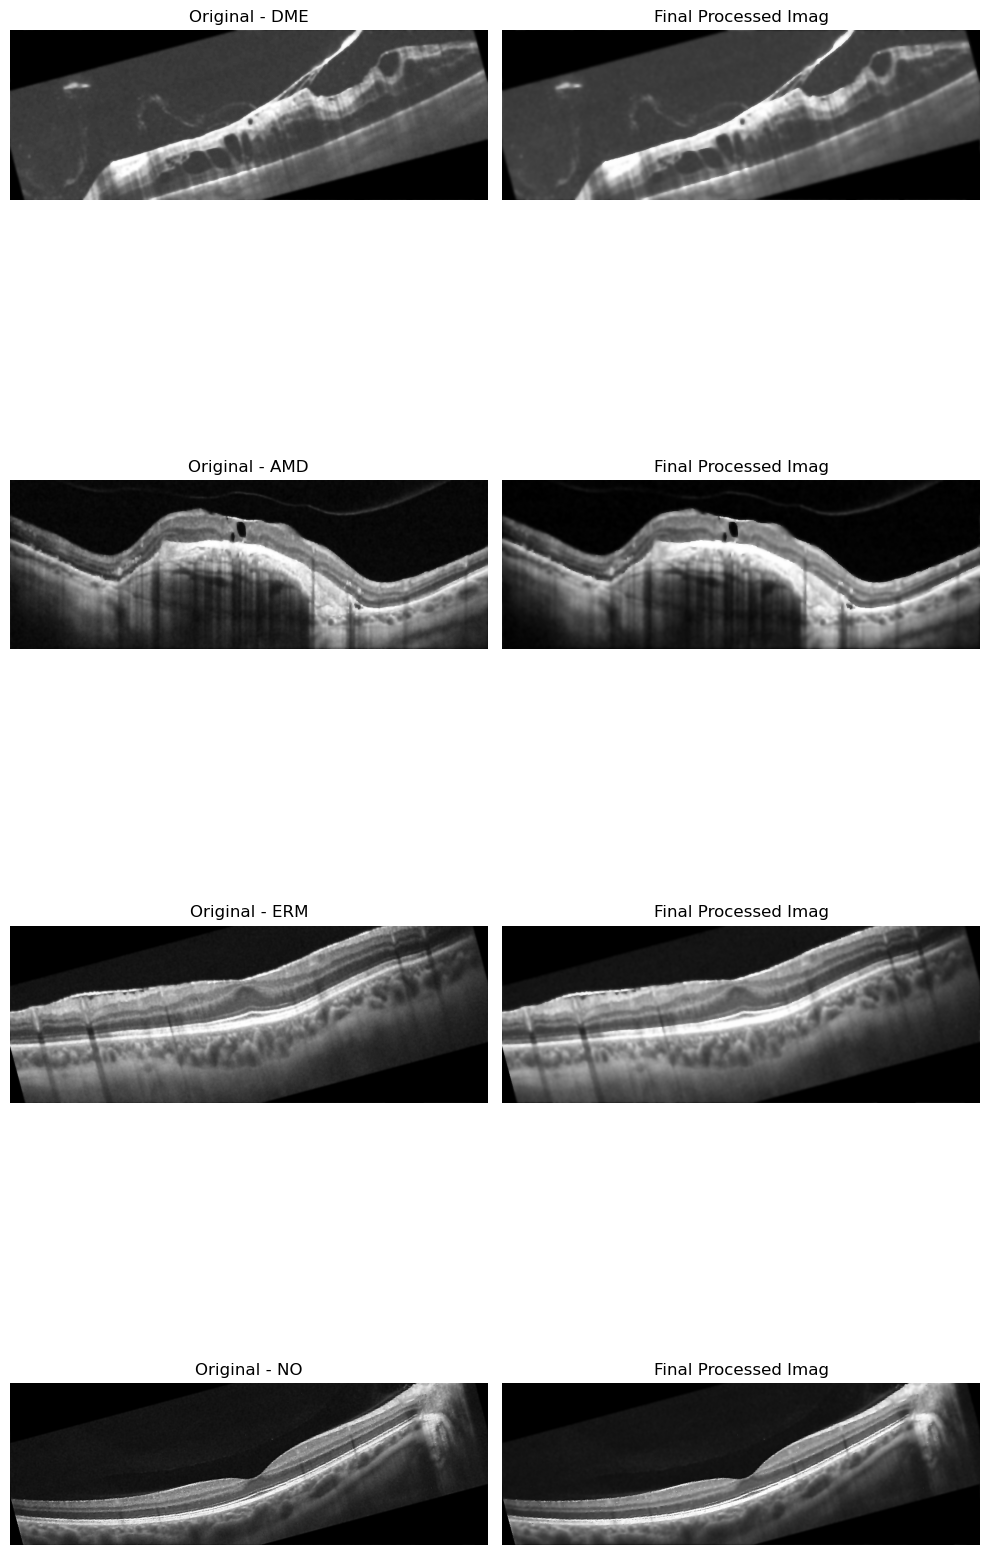

In [ ]:
import os
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define dataset path
dataset_path = "D:\\NOOR 4TH YEAR\\trial_preparation\\train"
# Define classes
classes = ["DME", "AMD", "ERM", "NO"]

# Function to load a random image from each class
def load_random_images(dataset_path, classes):
    images = {}
    for cls in classes:
        class_folder = os.path.join(dataset_path, cls)
        sample_images = [f for f in os.listdir(class_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        if sample_images:
            random_image = random.choice(sample_images)
            images[cls] = os.path.join(class_folder, random_image)
    return images

# Load one random image per class
selected_images = load_random_images(dataset_path, classes)

# Create a figure for visualization
fig, axs = plt.subplots(len(classes), 2, figsize=(10, len(classes) * 5))

for i, (cls, img_path) in enumerate(selected_images.items()):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # Apply preprocessing steps (Contrast enhancement + Anisotropic diffusion + 3D Conversion)
    final_img = convert_to_rgb(perona_malik_diffusion(contrast_enhancement(img)))

    # Plot original image
    axs[i, 0].imshow(img, cmap='gray')
    axs[i, 0].set_title(f"Original - {cls}")
    axs[i, 0].axis("off")

    # Plot final processed image (3D RGB)
    axs[i, 1].imshow(final_img)
    axs[i, 1].set_title("Final Processed Imag")
    axs[i, 1].axis("off")

plt.tight_layout()
plt.show()


In [ ]:
#@title squeezNet model(6)

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#  Define dataset path
dataset_dir = "D:\\NOOR 4TH YEAR\\trial_preparation"
train_dir = os.path.join(dataset_dir, "train")
val_dir = os.path.join(dataset_dir, "val")
test_dir = os.path.join(dataset_dir, "test")

#  Ensure directories exist
for path in [train_dir, val_dir, test_dir]:
    os.makedirs(path, exist_ok=True)
    print(f" Checked: {path}")

# Check if dataset is not empty
for split in ["train", "val", "test"]:
    split_dir = os.path.join(dataset_dir, split)
    if not os.listdir(split_dir):
        print(f"Warning: {split} folder is empty!")
    else:
        print(f"Found {len(os.listdir(split_dir))} classes in {split}.")


 Checked: D:\NOOR 4TH YEAR\trial_preparation\train
 Checked: D:\NOOR 4TH YEAR\trial_preparation\val
 Checked: D:\NOOR 4TH YEAR\trial_preparation\test
Found 4 classes in train.
Found 4 classes in val.
Found 4 classes in test.


In [ ]:
train_dataset = ImageFolder(root=train_dir, transform=transform)
val_dataset = ImageFolder(root=val_dir, transform=transform)
test_dataset = ImageFolder(root=test_dir, transform=transform)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

num_classes = len(train_dataset.classes)
print(f" Classes: {train_dataset.classes}")
print(f" Train: {len(train_dataset)} | Val: {len(val_dataset)} | Test: {len(test_dataset)}")


 Classes: ['AMD', 'DME', 'ERM', 'NO']
 Train: 3481 | Val: 745 | Test: 749


In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.squeezenet1_0(pretrained=True)

#  Modify classifier for 4 classes
model.classifier[1] = nn.Conv2d(512, num_classes, kernel_size=(1,1), stride=(1,1))
model.num_classes = num_classes
model.to(device)


C:\Users\PC\anaconda3\envs\tensorflow\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\PC\anaconda3\envs\tensorflow\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SqueezeNet1_0_Weights.IMAGENET1K_V1`. You can also use `weights=SqueezeNet1_0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


SqueezeNet(
  (features): Sequential(
    (0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
    (3): Fire(
      (squeeze): Conv2d(96, 16, kernel_size=(1, 1), stride=(1, 1))
      (squeeze_activation): ReLU(inplace=True)
      (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
      (expand1x1_activation): ReLU(inplace=True)
      (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (expand3x3_activation): ReLU(inplace=True)
    )
    (4): Fire(
      (squeeze): Conv2d(128, 16, kernel_size=(1, 1), stride=(1, 1))
      (squeeze_activation): ReLU(inplace=True)
      (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
      (expand1x1_activation): ReLU(inplace=True)
      (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (expand3x3_activation): ReLU(inplace=True)
    )
    (5): Fire(
   

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


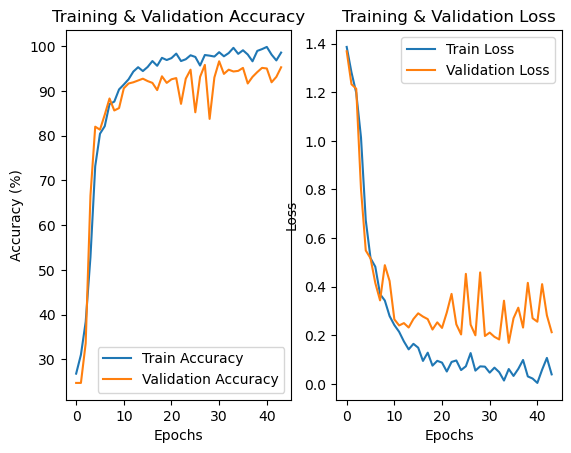

 Early Stopping at Epoch 45 (No Improvement for 10 Epochs)


In [ ]:
import torch
import matplotlib.pyplot as plt
from IPython.display import clear_output

# Initialize variables
num_epochs = 50  # Set max epochs
patience = 10  # Number of epochs to wait before stopping
best_val_loss = float("inf")  # Initialize best validation loss
counter = 0  # Count epochs without improvement

train_acc_list, val_acc_list, train_loss_list, val_loss_list = [], [], [], []

plt.figure(figsize=(12, 5))

for epoch in range(num_epochs):
    model.train()
    train_loss, correct, total = 0, 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_acc = 100 * correct / total
    train_loss /= len(train_loader)

    #  Validation
    model.eval()
    val_loss, correct, total = 0, 0, 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    val_acc = 100 * correct / total
    val_loss /= len(val_loader)

    #  Store results
    train_loss_list.append(train_loss)
    val_loss_list.append(val_loss)
    train_acc_list.append(train_acc)
    val_acc_list.append(val_acc)

    #  Check for Early Stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        counter = 0  # Reset counter if improvement
        torch.save(model.state_dict(), "best_model.pth")  # Save best model
    else:
        counter += 1  # Increment counter if no improvement
        if counter >= patience:
            print(f" Early Stopping at Epoch {epoch+1} (No Improvement for {patience} Epochs)")
            break  # Stop training

    # Print progress
    print(f"Epoch [{epoch+1}/{num_epochs}] -> Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}% | Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")

    #  Live Plot
    clear_output(wait=True)
    plt.clf()
    plt.subplot(1, 2, 1)
    plt.plot(train_acc_list, label="Train Accuracy")
    plt.plot(val_acc_list, label="Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy (%)")
    plt.legend()
    plt.title("Training & Validation Accuracy")

    plt.subplot(1, 2, 2)
    plt.plot(train_loss_list, label="Train Loss")
    plt.plot(val_loss_list, label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.title("Training & Validation Loss")

    plt.pause(0.1)

plt.show()


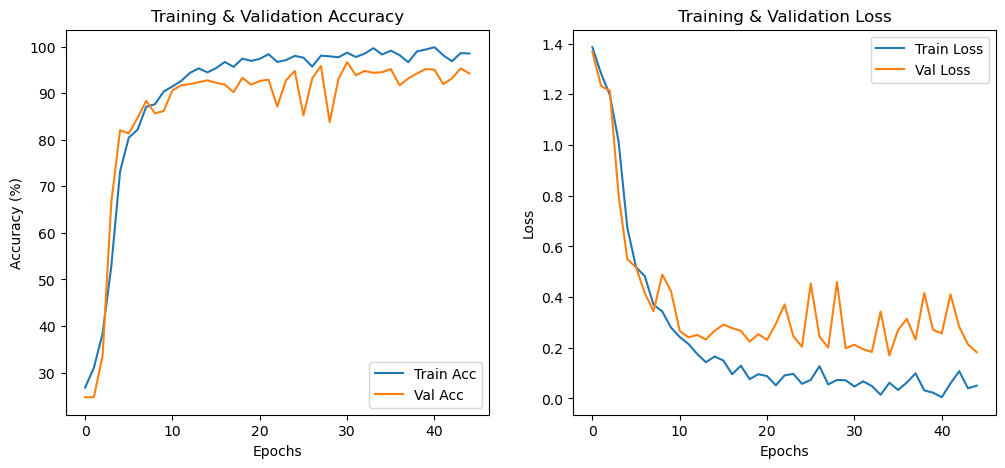

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_acc_list, label="Train Acc")
plt.plot(val_acc_list, label="Val Acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.title("Training & Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(train_loss_list, label="Train Loss")
plt.plot(val_loss_list, label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training & Validation Loss")
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load test data
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

# Evaluate model
model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())


In [ ]:
from sklearn.metrics import accuracy_score


accuracy = accuracy_score(y_true, y_pred)

print(f"Test Accuracy: {accuracy:.4f}")


Test Accuracy: 0.9453


In [ ]:
model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = outputs.max(1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())


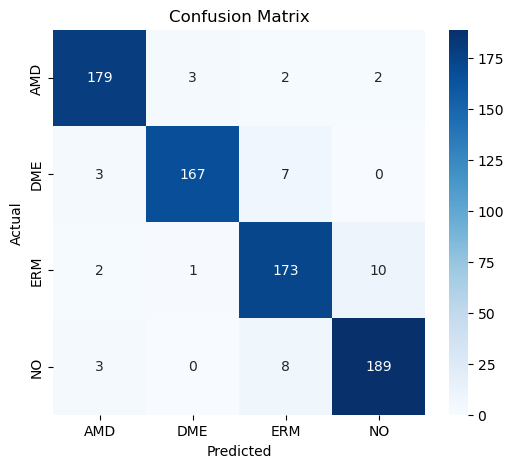

In [ ]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=train_dataset.classes, yticklabels=train_dataset.classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=train_dataset.classes))


Classification Report:
               precision    recall  f1-score   support

         AMD       0.96      0.96      0.96       186
         DME       0.98      0.94      0.96       177
         ERM       0.91      0.93      0.92       186
          NO       0.94      0.94      0.94       200

    accuracy                           0.95       749
   macro avg       0.95      0.95      0.95       749
weighted avg       0.95      0.95      0.95       749



In [ ]:
TP = np.diag(cm)
FP = np.sum(cm, axis=0) - TP
FN = np.sum(cm, axis=1) - TP
TN = np.sum(cm) - (FP + FN + TP)

accuracy = np.sum(TP) / np.sum(cm)
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)
precision = TP / (TP + FP)
FPR = FP / (FP + TN)
FNR = FN / (FN + TP)
NPV = TN / (TN + FN)
F1 = 2 * (precision * sensitivity) / (precision + sensitivity)

print(f" Accuracy: {accuracy:.4f}")
print(f" Sensitivity (Recall): {np.mean(sensitivity):.4f}")
print(f" Specificity: {np.mean(specificity):.4f}")
print(f" Precision: {np.mean(precision):.4f}")
print(f" False Positive Rate (FPR): {np.mean(FPR):.4f}")
print(f" False Negative Rate (FNR): {np.mean(FNR):.4f}")
print(f" Negative Predictive Value (NPV): {np.mean(NPV):.4f}")
print(f" F1 Score: {np.mean(F1):.4f}")


 Accuracy: 0.9453
 Sensitivity (Recall): 0.9452
 Specificity: 0.9817
 Precision: 0.9462
 False Positive Rate (FPR): 0.0183
 False Negative Rate (FNR): 0.0548
 Negative Predictive Value (NPV): 0.9817
 F1 Score: 0.9456


In [ ]:
#@title inceptionv3 model(7)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Define dataset path
dataset_path = "D:\\NOOR 4TH YEAR\\trial_preparation"

# Image parameters
img_size = 299
batch_size = 16
epochs = 15

# Load Data Without Augmentation
def load_data(subset, shuffle=True):
    datagen = ImageDataGenerator(rescale=1.0/255)
    return datagen.flow_from_directory(
        dataset_path + '/' + subset,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=shuffle  # Shuffle only for training
    )

train_data = load_data('train', shuffle=True)
val_data = load_data('val', shuffle=True)
test_data = load_data('test', shuffle=False)  # No shuffle for test


Found 3481 images belonging to 4 classes.
Found 745 images belonging to 4 classes.
Found 749 images belonging to 4 classes.


In [ ]:
# Load InceptionV3 Model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

# Fine-Tune Last 50 Layers
for layer in base_model.layers[:-50]:
    layer.trainable = False
for layer in base_model.layers[-50:]:
    layer.trainable = True

# Add Custom Layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)  # L2 Regularization
x = Dropout(0.5)(x)  # Dropout to reduce overfitting
x = Dense(4, activation='softmax', kernel_initializer=tf.keras.initializers.he_normal(seed=42),
          bias_initializer='zeros')(x)

# Create Model
model = Model(inputs=base_model.input, outputs=x)

# Compile Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),  # Tuned LR
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6, verbose=1)

# Train Model
history = model.fit(train_data, epochs=epochs, validation_data=val_data, callbacks=[early_stopping, reduce_lr])

# Save Model
model.save("OCT_InceptionV3.h5")


Epoch 1/15
218/218 [==============================] - 256s 1s/step - loss: 7.3204 - accuracy: 0.8090 - val_loss: 5.8271 - val_accuracy: 0.9208 - lr: 1.0000e-04
Epoch 2/15
218/218 [==============================] - 247s 1s/step - loss: 4.8566 - accuracy: 0.9425 - val_loss: 3.9872 - val_accuracy: 0.9584 - lr: 1.0000e-04
Epoch 3/15
218/218 [==============================] - 252s 1s/step - loss: 3.2901 - accuracy: 0.9756 - val_loss: 2.7985 - val_accuracy: 0.9490 - lr: 1.0000e-04
Epoch 4/15
218/218 [==============================] - 251s 1s/step - loss: 2.2392 - accuracy: 0.9836 - val_loss: 1.9192 - val_accuracy: 0.9597 - lr: 1.0000e-04
Epoch 5/15
218/218 [==============================] - 249s 1s/step - loss: 1.5120 - accuracy: 0.9879 - val_loss: 1.3304 - val_accuracy: 0.9597 - lr: 1.0000e-04
Epoch 6/15
218/218 [==============================] - 252s 1s/step - loss: 1.0306 - accuracy: 0.9810 - val_loss: 0.9009 - val_accuracy: 0.9624 - lr: 1.0000e-04
Epoch 7/15
218/218 [====================

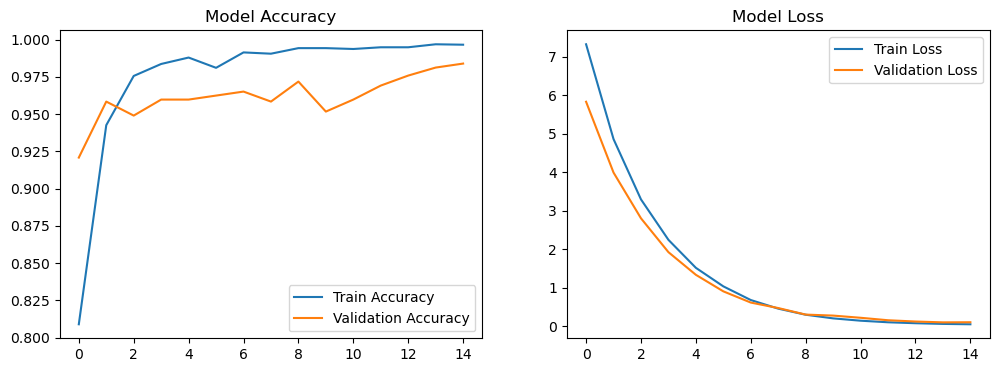

47/47 [==============================] - 37s 763ms/step

Classification Report:
               precision    recall  f1-score   support

         AMD       0.97      0.95      0.96       186
         DME       0.98      0.99      0.99       177
         ERM       0.99      0.99      0.99       186
          NO       0.97      0.98      0.98       200

    accuracy                           0.98       749
   macro avg       0.98      0.98      0.98       749
weighted avg       0.98      0.98      0.98       749



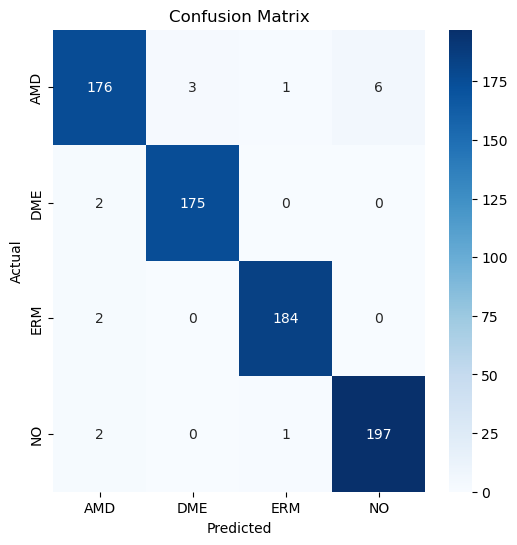


Performance Metrics:
Classification Accuracy: 0.9773
Sensitivity (Recall): 0.9773
Specificity: 0.9775
Precision: 0.9775
False Positive Rate (FPR): 186.2725
False Negative Rate (FNR): 186.2727
Negative Predictive Value (NPV): 0.9773
F1 Score: 0.9773


In [ ]:
# Plot Training Results
def plot_performance(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title('Model Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title('Model Loss')
    plt.show()

plot_performance(history)

# Evaluate Model on Test Data
y_true = test_data.classes
y_pred_probs = model.predict(test_data)
y_pred = np.argmax(y_pred_probs, axis=1)

# Classification Report
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=test_data.class_indices.keys()))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_data.class_indices.keys(),
            yticklabels=test_data.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Compute Performance Metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

# Compute Sensitivity, Specificity, FPR, FNR, NPV
sensitivity = recall
specificity = np.mean([cm[i, i] / (cm[i, i] + np.sum(cm[:, i]) - cm[i, i]) for i in range(len(cm))])
false_positive_rate = np.mean([np.sum(cm[:, i]) - cm[i, i] / np.sum(cm[:, i]) for i in range(len(cm))])
false_negative_rate = np.mean([np.sum(cm[i, :]) - cm[i, i] / np.sum(cm[i, :]) for i in range(len(cm))])
negative_predictive_value = np.mean([cm[i, i] / (cm[i, i] + np.sum(cm[i, :]) - cm[i, i]) for i in range(len(cm))])

# Print Performance Metrics
print("\nPerformance Metrics:")
print(f"Classification Accuracy: {accuracy:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Precision: {precision:.4f}")
print(f"False Positive Rate (FPR): {false_positive_rate:.4f}")
print(f"False Negative Rate (FNR): {false_negative_rate:.4f}")
print(f"Negative Predictive Value (NPV): {negative_predictive_value:.4f}")
print(f"F1 Score: {f1:.4f}")